# Load model and output

In [1]:
from cobra import io
# Load model and results as dict
model_path = 'combo_stem.xml'
stem_model = io.read_sbml_model(model_path)
ub={}
lb={}
for rxn in stem_model.reactions:
    ub[rxn.id]=rxn.upper_bound
    lb[rxn.id]=rxn.lower_bound

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-06


In [2]:
# Load regrex as dict
import pandas as pd
rs2=pd.read_csv('SI_files/ST1.csv')
rxnid='Reaction ID'
rsol={}
rpick = 'RegrEx'
for ii in range(len(rs2)):
    rsol[rs2.loc[ii][rxnid]]=rs2.loc[ii][rpick]
for rxn in stem_model.reactions:
    if rxn.id not in rsol.keys():
        rsol[rxn.id] = 0

nopsiirsol={}
rpick = 'RegrEx (w/o PSII)'
for ii in range(len(rs2)):
    nopsiirsol[rs2.loc[ii][rxnid]]=rs2.loc[ii][rpick]
for rxn in stem_model.reactions:
    if rxn.id not in nopsiirsol.keys():
        nopsiirsol[rxn.id] = 0


psol={}
# rpick = 'parsimonious'
rpick = 'Parsimonious'
for ii in range(len(rs2)):
    psol[rs2.loc[ii][rxnid]]=rs2.loc[ii][rpick]
for rxn in stem_model.reactions:
    if rxn.id not in psol.keys():
        psol[rxn.id] = 0

fva_sol={}
fva_sol['minimum']={}
fva_sol['maximum']={}
for ii in range(len(rs2)):
    fva_sol['minimum'][rs2.loc[ii][rxnid]]=rs2.loc[ii]['FVA_min']
    fva_sol['maximum'][rs2.loc[ii][rxnid]]=rs2.loc[ii]['FVA_max']
for rxn in stem_model.reactions:
    if rxn.id not in fva_sol['minimum'].keys():
        fva_sol['minimum'] = 0
        fva_sol['maximum'] = 0

pfva_sol={}
pfva_sol['minimum']={}
pfva_sol['maximum']={}
for ii in range(len(rs2)):
    pfva_sol['minimum'][rs2.loc[ii][rxnid]]=rs2.loc[ii]['FVA_min (parsimonious)']
    pfva_sol['maximum'][rs2.loc[ii][rxnid]]=rs2.loc[ii]['FVA_max (parsimonious)']
for rxn in stem_model.reactions:
    if rxn.id not in pfva_sol['minimum'].keys():
        pfva_sol['minimum'] = 0
        pfva_sol['maximum'] = 0

transcriptdict={}
rpick = 'Transcript abundance'
for ii in range(len(rs2)):
    transcriptdict[rs2.loc[ii][rxnid]]=rs2.loc[ii][rpick]
for rxn in stem_model.reactions:
    if rxn.id not in transcriptdict.keys():
        transcriptdict[rxn.id] = 0



# Figure 4

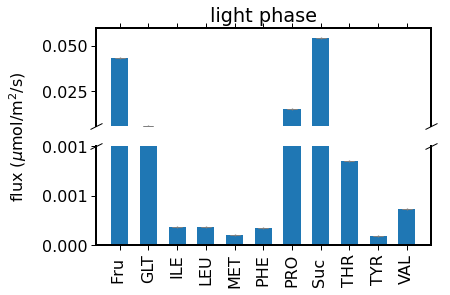

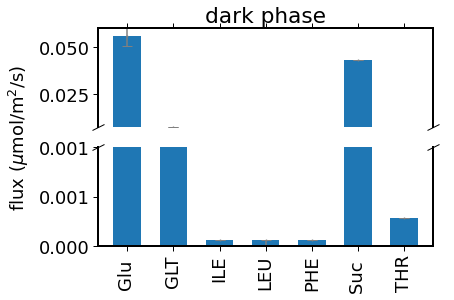

In [17]:
import importlib,sys
importlib.reload(sys.modules['analysis'])
from analysis import *

plot_apo_transport(stem_model,rsol,exclude_rxns=['PROTON_PPI','O2_ec','H2O_ec','K_'],ymax=0.06,ybreak=0.001,rangeplot=1,fva_sol_min=fva_sol['minimum'],fva_sol_max=fva_sol['maximum'],savebool='newlabell',plttitle='light phase',exp=1)
plot_apo_transport(stem_model,rsol,cell_type='CC_d',exclude_rxns=['PROTON_PPI','O2_ec','H2O_ec','K_'],thresh=5e-5,ymax=0.06,ybreak=0.001,rangeplot=1,fva_sol_min=fva_sol['minimum'],fva_sol_max=fva_sol['maximum'],plttitle='dark phase',exp=1,savebool='newlabeld')

# Figure 7

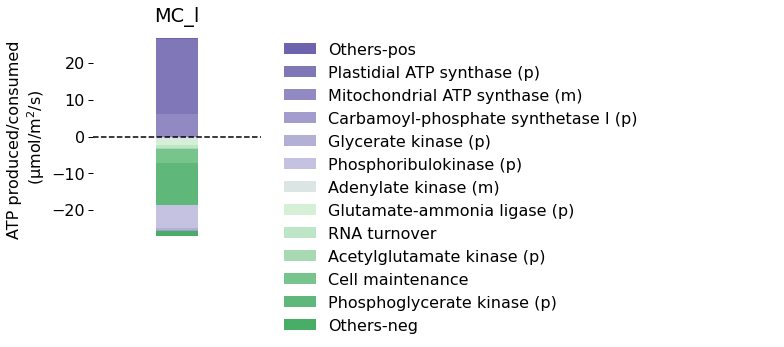

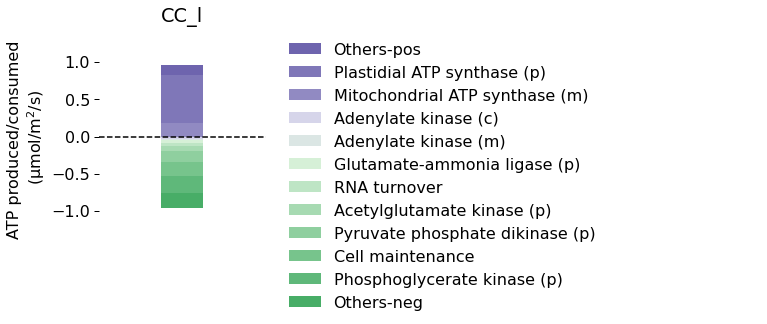

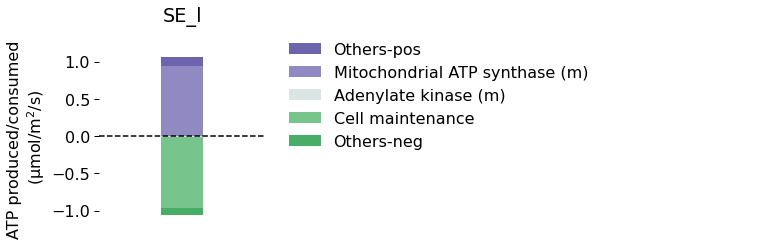

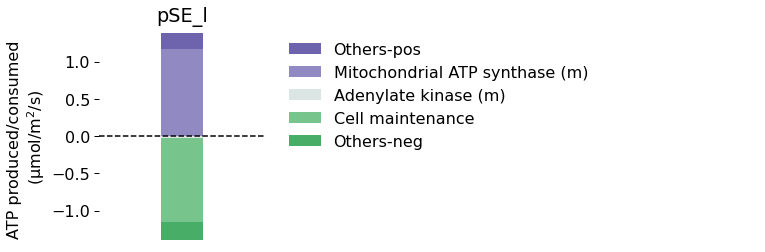

In [4]:
import importlib, sys
importlib.reload(sys.modules['analysis'])
from analysis import *
fig, t1,t2=generateuniformbudget(stem_model,rsol,outdict=1,numindict=13,save_plot_to=1,names=True,lightphase=['l'],metin='ATP',altmets=['aATP'],coloradj=0,thresh=5e-3,percell='',filetype='svg',diflims=['_MC_l'])

In [ ]:
fig, t1,t2=generateuniformbudget(stem_model,rsol,outdict=1,numindict=13,save_plot_to=1,names=True,lightphase=['l'],metin='PPI',altmets=['aPPI','bPPI'],coloradj=-3,thresh=3e-3,percell='',filetype='svg',diflims=['_MC_l'])

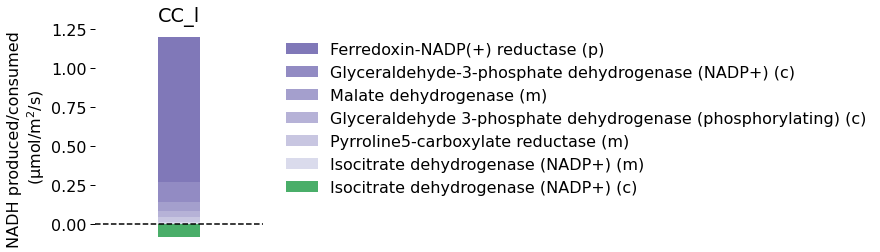

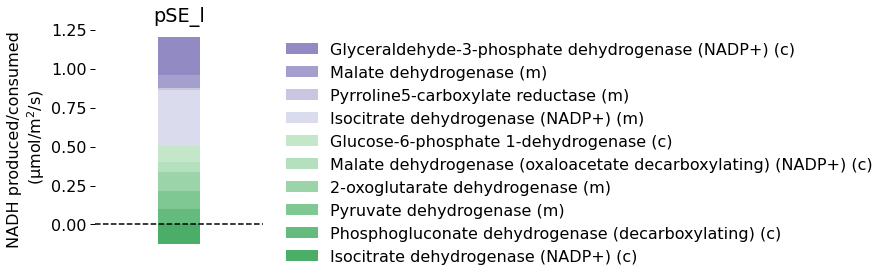

In [4]:
import importlib,sys
importlib.reload(sys.modules['analysis'])
from analysis import *
fig, t1,t2=generateuniformbudget(stem_model,rsol,outdict=1,numindict=13,save_plot_to=1,names=True,lightphase=['l'],metin='NADH',altmets=['NADPH'],coloradj=-6,thresh=5e-3,percell='',filetype='svg',cells=['_CC_','_pSE_'])